In [1]:
import pandas as pd
import statsmodels.api as sm

C:\Users\Katrina\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Sec 1 Homework #1

## Katrina Rivera, 004886996

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)

In [3]:
data.index = pd.to_datetime(data.index)

In [6]:
data = data.dropna()

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [8]:
split1 = int(len(data) * .6)
split2 = int(len(data) * .9)
data_in = data[:split1]
data_out = data[split1:split2]
data_hold = data[split2:]

In [9]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [10]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out =  sm.add_constant(X_out)
X_hold =  sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [11]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [12]:
import matplotlib.pyplot as plt

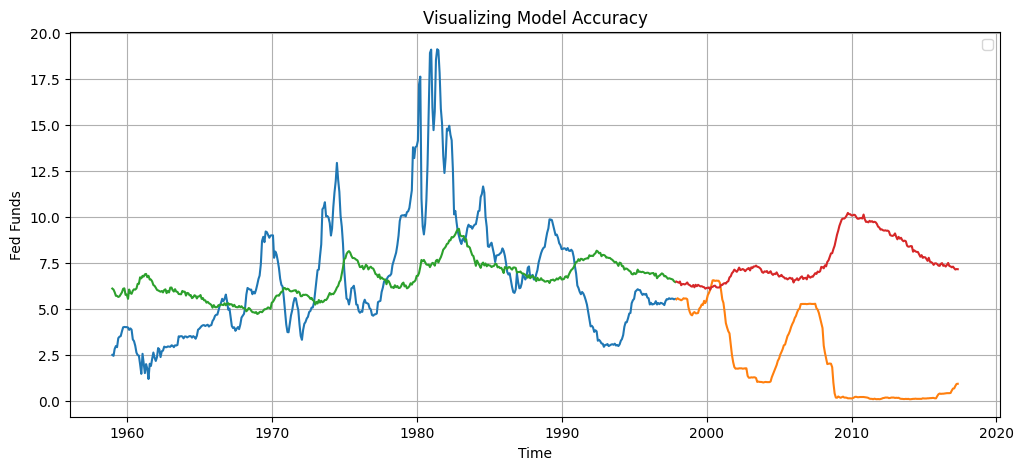

In [18]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))
###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
in_mse_1 = mean_squared_error(model1.predict(X_in), y_in)
out_mse_1 = mean_squared_error(model1.predict(X_out), y_out)

In [21]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.07142201316864
Outsample MSE :  40.36082783566732


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
max_degrees = 3

DEGREEE : 1


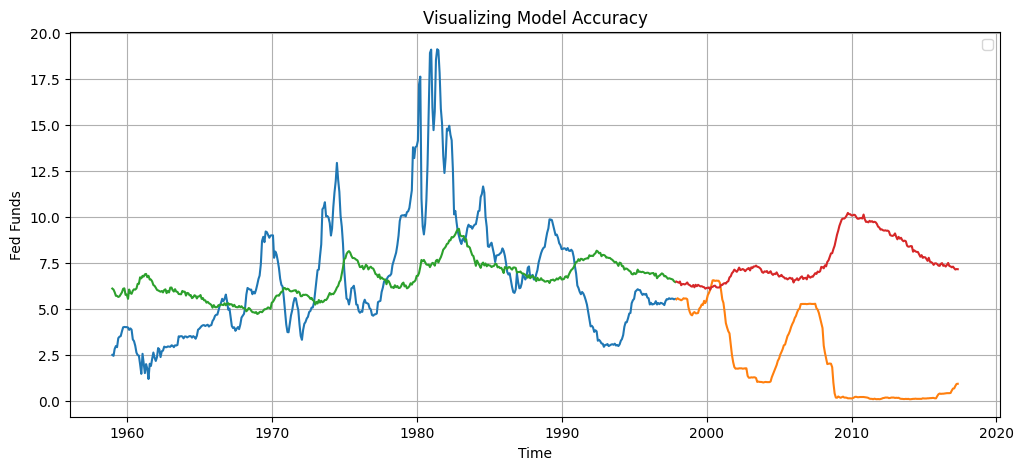

Insample MSE :  10.071422013168641
Outsample MSE :  40.3608278356659
DEGREEE : 2


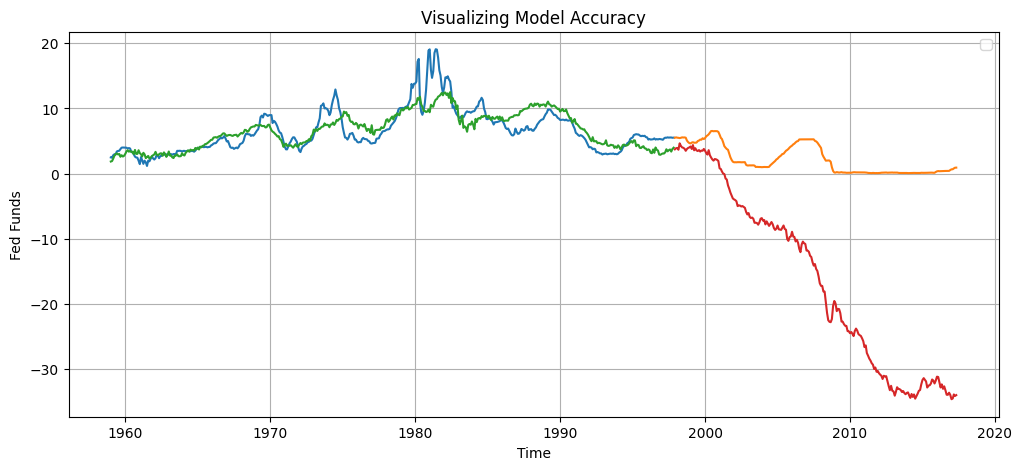

Insample MSE :  3.863477139276067
Outsample MSE :  481.4465098816045
DEGREEE : 3


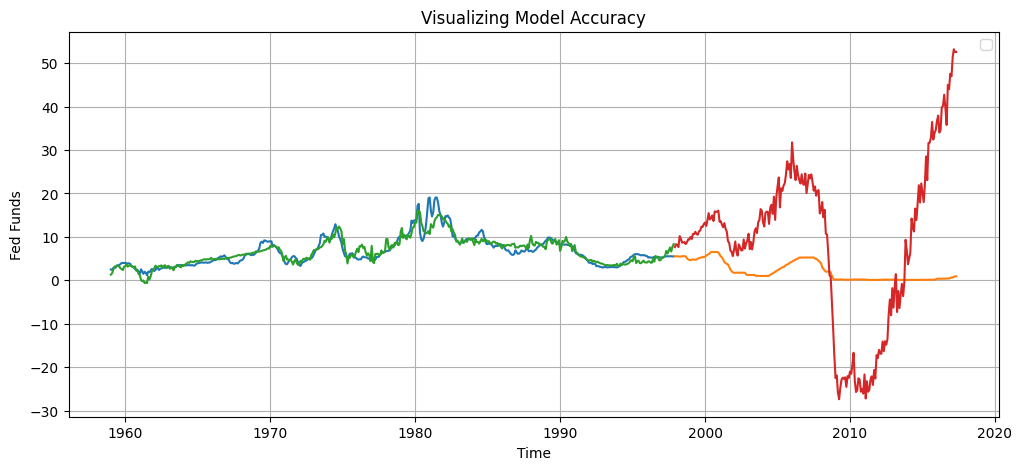

Insample MSE :  1.8723636266426864
Outsample MSE :  371.7678871134692


In [45]:
for degrees in range(1, max_degrees+1):
    print("DEGREEE :", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    plt.figure(figsize = (12,5))
    pred_in = model1.predict(X_in_poly)
    pred_in = pd.DataFrame(pred_in, index = y_in.index)
    pred_out = model1.predict(X_out_poly)
    pred_out = pd.DataFrame(pred_out, index = y_out.index)
    
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(pred_in)
    plt.plot(pred_out)
    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend([])
    plt.grid()
    plt.show()
    
    in_mse = mean_squared_error(model1.predict(X_in_poly), y_in)
    out_mse = mean_squared_error(model1.predict(X_out_poly), y_out)
    
    print("Insample MSE : ", in_mse)
    print("Outsample MSE : ", out_mse)
    

# 7.) State your observations :

For degree 1, the in-sample and out of sample prediction are poor compared to the actual data using the graph. The MSE for the insample is around 10 and for the outsample is around 40. For degree 2, the in-sample prediction appears to be relatively close to the in-sample data; however, the model does very poorly on the out of sample data. This is reflected in the MSE; the in-sample MSE is around 4, which is smaller than the degree 1 in-sample MSE. The out of sample MSE is around 480; this is much larger than the degree 1 MSE. This pattern is similar with degree 3; the in-sample prediction matches extremely closely to the in-sample data; the in-sample MSE is around 2. The out of sample MSE is very large, and the fit is very poor if we observe the graph.

This indicates the variance-bias tradeoff. While the degree 1 model has more bias in the in-sample data, it has reduced variability, so it has less variability when predicting the out of sample data. As the degree value increases, the in-sample bias decreases, which is due to overfitting the in-sample data; this causes the variability of the model to increase. Therefore, higher degree values have increased performance on the in-sample data but have heavily decreased performance on the out of sample data. From the information we calculated in question 6, we can conclude that a model with one degree is the best model for our data. This is because it has the smallest out of sample MSE; the increase in the in-sample MSE is not large enough to justify using a higher polynomial degree. We can check our reasoning using the hold out sample. The best model will be the model with the smallest hold out sample MSE.

In [49]:
for degrees in range(1, max_degrees+1):
    print("DEGREEE :", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    X_hold_poly = poly.fit_transform(X_hold)
    
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
    hold_mse = mean_squared_error(model1.predict(X_hold_poly), y_hold)
    
    print("Hold Out Sample MSE : ", hold_mse)
    

DEGREEE : 1
Hold Out Sample MSE :  36.85047409487426
DEGREEE : 2
Hold Out Sample MSE :  3178.5506644877573
DEGREEE : 3
Hold Out Sample MSE :  15719.564627500107


The smallest hold out sample MSE is for a model with a polynomial degree of 1. This aligns with our prior reasoning, which is that models with a polynomial degree higher than 1 overfit our data and have extremely high variability, reducing the predictive power of the model. We can conclude that a degree of 1 manages to balance variability and bias for our model, meaning that a degree of 1 is the best complexity for our model given polynomial degrees of 1, 2, and 3. 